In [1]:
# Check Scipy version

import scipy
print(scipy.__version__)

1.7.1


Tutorial
https://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages/

In [2]:
# Import pandas, numpy, scip.stats

import pandas as pd
import numpy as np
import scipy.stats as stats

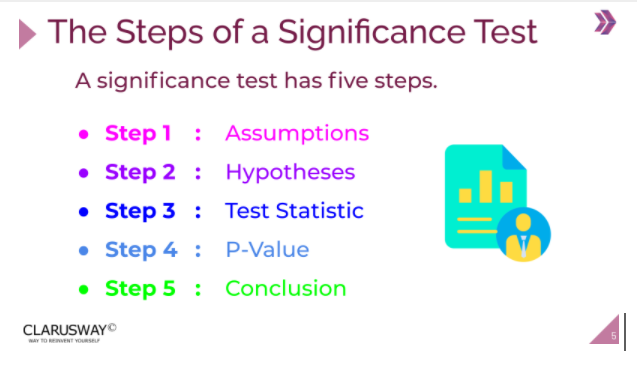

## One Sample T Test

- According to Reynolds Intellectual Ability Scales, the average VIQ (Verbal IQ scores based on the four Wechsler (1981) subtests) is about 109.

- In our sample data, we have a sample of 40 cases. 
- Let's test if the average VIQ of people is significantly bigger than 109.

In [3]:
# Brain size and weight and IQ data (Willerman et al. 1991)
df = pd.read_csv("brain_size.csv", sep=";", na_values = ".", index_col = 0)

In [4]:
df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [ ]:
# H0: mean = 109
# H1: mean > 109

In [5]:
# Calculate the mean of VIQ
xbar = df.VIQ.mean()
xbar

112.35

In [6]:
# Calculate the std of VIQ
s = df.VIQ.std()
s

23.616107063199742

In [7]:
df.shape

(40, 7)

In [8]:
# Calculate the test statistic
t_test = (xbar-109) / (s/np.sqrt(df.shape[0]))

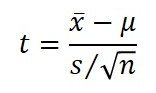

In [9]:
#test statistic
t_test

0.8971529586323551

In [10]:
# Calculate p-value
pValue = 1 - stats.t.cdf(t_test, 39)
pValue

0.18757115929257173

In [11]:
# Use stats.ttest_1samp() to calculate the test statistic and p-value

oneSamp = stats.ttest_1samp(df.VIQ, 109, alternative='greater')  # default is two-sided
oneSamp

Ttest_1sampResult(statistic=0.897152958632355, pvalue=0.1875711592925718)

In [12]:
#Display p-value
oneSamp.pvalue

0.1875711592925718

In [13]:
# Compare p-value and alpha
alpha = 0.05

if oneSamp.pvalue < alpha:
    print('Reject The Null')
else:
    print('Fail to Reject The Null')

Fail to Reject The Null


# Independent Samples T Test

## Arsenic Example

- Arsenic concentration in public drinking water supplies is a potential health risk. 
- An article in the Arizona Republic (May 27, 2001) reported drinking water arsenic concentrations in parts per billion (ppb) for 10 metropolitan Phoenix communities and 10 communities in rural Arizona.
- You can find the data in CSV file.

Determine if there is any difference in mean arsenic concentrations between metropolitan Phoenix communities and communities in rural Arizona.

In [14]:
#Import arsenic dataset
arsenic = pd.read_csv("arsenic.csv")

In [15]:
arsenic

,Metro Phoenix,x1,Rural Arizona,x2
0,Phoenix,3,Rimrock,48
1,Chandler,7,Goodyear,44
2,Gilbert,25,New River,40
3,Glendale,10,Apache Junction,38
4,Mesa,15,Buckeye,33
5,Paradise Valley,6,Nogales,21
6,Peoria,12,Black Canyon City,20
7,Scottsdale,25,Sedona,12
8,Tempe,15,Payson,1
9,Sun City,7,Casa Grande,18


In [ ]:
# H0: mu1 = mu2
# H1: mu1 != mu2

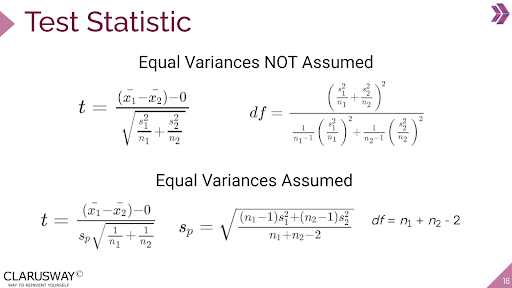

In [16]:
#Perform Levene test for equal variances
#H0: The population variances are equal
#H1: There is a difference between the variances in the population
#The small p-value suggests that the populations do not have equal variances.

leveneTest = stats.levene(arsenic.x1, arsenic.x2)
leveneTest

LeveneResult(statistic=7.7015516672169, pvalue=0.012482954069299166)

In [17]:
# average Metro Phoenix
arsenic.x1.mean()

12.5

In [18]:
# average Rural Arizona
arsenic.x2.mean()

27.5

Calculate the T-test for the means of two independent samples of scores.

In [ ]:
# H0: mu1 = mu2
# H1: mu1 != mu2

In [19]:
# Calculate test statistics using stats.ttest_ind()
IndTest = stats.ttest_ind(arsenic.x1, arsenic.x2, equal_var = False)

In [20]:
IndTest

Ttest_indResult(statistic=-2.7669395785560558, pvalue=0.015827284816100885)

In [21]:
# second solution

IndTest2 = stats.ttest_ind_from_stats(mean1=12.5, std1=arsenic.x1.std(), nobs1=10, # default two-sided
                                      mean2=27.5, std2=arsenic.x2.std(), nobs2=10, equal_var = False)
IndTest2

Ttest_indResult(statistic=-2.7669395785560558, pvalue=0.015827284816100892)

In [22]:
IndTest.statistic

-2.7669395785560558

In [23]:
IndTest.pvalue

0.015827284816100885

In [24]:
# Decision
alpha = 0.05

if IndTest.pvalue < alpha:
    print('Reject The Null')
else:
    print('Fail to Reject The Null')

Reject The Null


We can conclude that mean arsenic concentration in the
drinking water in rural Arizona is different from the mean arsenic
concentration in metropolitan Phoenix drinking water.

# Paired (Dependent) Samples T Test

## Prozac Data

- Let us consider a simple example of what is often termed "pre/post" data or "pretest/posttest" data. 
- Suppose you wish to test the effect of Prozac on the well-being of depressed individuals, using a standardised "well-being scale" that sums Likert-type items to obtain a score that could range from 0 to 20. 
- Higher scores indicate greater well-being (that is, Prozac is having a positive effect). 
- While there are flaws in this design (e.g., lack of a control group) it will serve as an example of how to analyse such data.

Determine if Prozac enhances well-being in depressed individuals. Use   0.05


In [25]:
# read prozac dataset
prozac = pd.read_csv("prozac.csv")

In [26]:
prozac

,moodpre,moodpost,difference
0,3,5,2
1,0,1,1
2,6,5,-1
3,7,7,0
4,4,10,6
5,3,9,6
6,2,7,5
7,1,11,10
8,4,8,4


In [ ]:
# H0: d_bar = 0  (d : difference)
# H1: d_bar > 0  

In [43]:
# Calculate test statistics using stats.ttest_rel()  

In [27]:
# moodpost - moodpre

pairedtest = stats.ttest_rel(prozac.moodpost, prozac.moodpre, alternative='greater')
pairedtest

Ttest_relResult(statistic=3.1428571428571423, pvalue=0.006872912197394246)

In [28]:
# moodpre - moodpost
# H0: d_bar = 0
# H1: dbar < 0

stats.ttest_rel(prozac.moodpre, prozac.moodpost, alternative='less')

Ttest_relResult(statistic=-3.1428571428571423, pvalue=0.006872912197394246)

In [29]:
# Decision
alpha = 0.05

if pairedtest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null
